# Vapor-compression refrigeration cycle

##  coolprop
 
CoolProp is a thermophysical property database and wrappers for a selection of programming environments. 

It offers similar functionality to **REFPROP**, but CoolProp is open-source and free.

>REFPROP: 美国国家标准与技术研究所(NIST)的一款物性数据库。其全称为Reference Fluid Thermodynamic and Transport Properties Database，即流体热力学和输运性质数据库

It was originally developed by Ian Bell, at the time a post-doc at the University of Liege, in Liege, Belgium.

* http://www.coolprop.org/

* https://github.com/CoolProp/CoolProp

### Python Wrapper

```
python -m pip install coolprop
```

#### PropsSI function

For many users, all that is needed is a simple call to the **PropsSI** function for pure fluids, pseudo-pure fluids and mixtures. For humid air properties, see Humid air properties


#### Table of string inputs to PropsSI function

* http://www.coolprop.org/coolprop/HighLevelAPI.html#parameter-table

| Parameter | Units   | Description|
| ---- |:------:| -----------:|
| P   | Pa	  | Pressure     |
| T   | K    | 	Temp       |
| Q   |mol/mol|	Mass vapor quality |
| H   |J/kg   |	Enthalpy      | 
| S   |J/kg.k |	Entropy       |
| D   |kg/m^3 | Mass density    |


#### The examples using PropsSI

In [3]:
import CoolProp.CoolProp as cp
cp.PropsSI('P', 'T', 273.15+0, 'Q', 1, 'R134a')

292803.18233949516

In this example, 

(T, Q) -> P

* **The First parameter**, T, is **the output property** that will be returned from PropsSI.

* **The second and fourth parameters** are the specified **input pair of properties** that determine the state point where the output property will be calculated.

The output property and input pair properties are **text strings and must be quoted.** 

* The **third and fifth parameters** are the **values** of the **input pair properties** and will determine the state point

* The **sixth and last parameter** is the fluid for which the output property will be calculated; also **a quoted string**.


(T,Q) -> H

In [4]:
cp.PropsSI('H', 'T', 273.15+0, 'Q', 0, 'R134a')

199999.98852614488

(T,Q) -> S

In [5]:
cp.PropsSI('S', 'T', 273.15+0, 'Q', 0, 'R134a')

1000.0000369551423

 Critical Pressure and  Pressure

In [6]:
import CoolProp.CoolProp as cp
pc=cp.PropsSI("R134a", "Pcrit") #  Critical Pressure [Pa]
Tc=cp.PropsSI("R134a", "Tcrit") #  Critical Temperature [K]
print(pc)
print(Tc)

4059280.0
374.21


### phyprops 

phyprops: the **simple** interface package of CoolProp
```
 python -m pip install phyprops
```
| Parameter | Units  | Description|
| --------- |:-------:| --------------:|
| p       | MPa	  |  Pressure     |
| t       | °C   | 	Temp       |
| h       |kJ/kg  |	  Enthalpy      | 
| s       |kJ/kg.k |	Entropy       |
| x       |kg/kg  |	  Mass vapor quality |


```python
def tx_p(t, x, refrigerant):
def tx_s(t, x, refrigerant):
def tx_h(t, x, refrigerant):

def px_t(p, x, refrigerant):
def px_h(p, x, refrigerant):
def px_s(p, x, refrigerant):

def pt_h(p, t, refrigerant):
def pt_s(p, t, refrigerant):

def ps_h(p, s, refrigerant):
def ps_t(p, s, refrigerant):
def ps_x(p, s, refrigerant):

def ph_s(p, h, refrigerant):
def ph_t(p, h, refrigerant):
def ph_x(p, h, refrigerant):
```

In [1]:
from phyprops.prop_coolprop import *

refrigerant="R134a"

t = 29.27
p = 0.6854
h = pt_h(p,t, refrigerant) 
s = pt_s(p,t, refrigerant) 
print(p, t, h, s)

t = 40
x = 1
h = tx_h(t,x, refrigerant) 
print( h)


0.6854 29.27 416.20922969219487 1.7270805889626684
419.4285242466987


## 2 Vapor-Compression Refrigeration Cycle

>Yunus A. Cengel, Michael A. Boles,Thermodynamics: An Engineering Approach, 5th Edition, McGraw-Hill

###  An ideal vapor-compression refrigeration cycle

The ideal **vapor-compression refrigeration cycle(VCR)** shown

![ivcr-ts](./img/vcr/ivcr-ts.jpg)

It consists of **four** processes

* step 1 -> 2, **Isentropic compression（等熵压缩）**: saturated vapor at $P_L$ is compress isentropically to $P_H$ where it becomes superheated vapor.

* step 2 -> 3, **Isobaric heat rejection（等压散热）**:  heat $Q_{out}$ is transferred to the surrounding by condensation at $T_H$. 

* step 3 -> 4, **Isenthalpic expansion（等焓膨胀）**: the cycle is closed by throttling the liquid to the lower pressure $P_L$

* step 4 -> 1, **Isobaric heat addition(等压吸热）**: heat  $Q_{in}$is removed at the temperature $T_L$ from the system being refrigerated by the evaporation of a liquid under the pressure $P_L$


**EXAMPLE 11–1 The Ideal Vapor-Compression Refrigeration  Cycle**

A refrigerator uses R134a as the working fluid and operates on an ideal vapor-compression refrigeration cycle between 0.14 and 0.8 MPa.

If the mass flow rate of the refrigerant is 0.05 kg/s, 

**Determine** 

* (a) the rate of heat
removal from the refrigerated space and the power input to the compressor,
* (b) the rate of heat rejection to the environment, and 
* (c) the COP of the refrigerator.


![ivcr-11-1](./img/vcr/ivcr-11-1.jpg)


**Analysis**


(a) The compressor work is give by

$\dot{W}_{c}=\dot{m}*(h_2-h_1)$

The refrigeration capacity is

$\dot{Q}_{in}=\dot{m}*(h_1-h_4)$

in tons,

$\dot{Q}_{in}=\dot{m}*(h_1-h_4)*(60s/min)\frac{1ton}{211 kJ/min}$

(b)The rate of heat rejection from the refrigerant to the environment is

$\dot{Q}_{out}=\dot{m}*(h_2-h_3)$

(c) The coefficient of performance is

$COP_c=\frac{\dot{Q}_{in}}{\dot{W}_{c}}=\frac{h_1-h_4}{h_2-h_1}$


### Python Code

**expressions to code directly**

In [5]:
from phyprops.prop_coolprop import *

refrigerant="R134a"

mdot=0.05
p1=0.14
x1=1.0

p3=0.8
x3=0.0

t1=px_t(p1, x1, refrigerant)
h1=px_h(p1, x1, refrigerant)
s1=px_s(p1, x1,  refrigerant)

t3=px_t(p3, x3,  refrigerant)
h3=px_h(p3,x3,  refrigerant)

p2=p3;
s2=s1;
h2=ps_h(p2,s2,  refrigerant)

h4=h3;

# The compressor work is give by
wc=mdot*(h2-h1);
# The rate of heat rejection 
qout=mdot*(h2-h3);
# The refrigeration capacity 
qin=mdot*(h1-h4);
# The refrigeration capacity in tons
qin_tons=qin*60*(1/211);
# The coefficient of performance is
cop=(h1-h4)/(h2-h1);

print("The compressor work(kW): {:.2f}".format(wc))
print("The rate of heat rejection(kW): {:.2f}".format(qout))
print("The refrigeration capacity(kW): {:.2f}".format(qin))
print("\tcapacity(tons): {:.2f}".format(qin_tons))
print("The coefficient of performance: {:.2f}".format(cop))



The compressor work(kW): 1.81
The rate of heat rejection(kW): 8.99
The refrigeration capacity(kW): 7.18
	capacity(tons): 2.04
The coefficient of performance: 3.97


### T-s Diagram

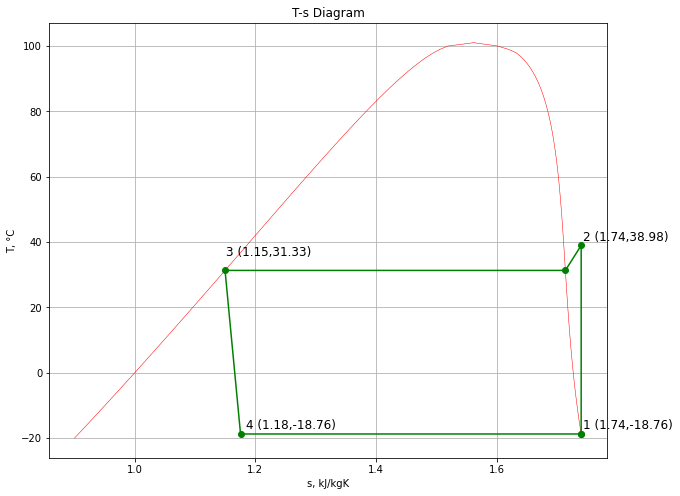

In [6]:
"""
T-s Diagram
"""
import CoolProp.CoolProp as cp
from phyprops.prop_coolprop import *

import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10.0, 8.0))  # figsize :set figure size
plt.title("T-s Diagram")
plt.xlabel("s, kJ/kgK")
plt.ylabel("T, °C")
plt.grid()

Tc=cp.PropsSI(refrigerant, "Tcrit") #  Critical point temperature [K]
tc = Tc-273.15
T = np.linspace(-20, tc,120)
for x in np.array([0, 1.0]):
    S=np.array([tx_s(t,x, refrigerant) for t in T])
    plt.plot(S, T, 'r', lw=0.5)

# cycle
t2= ps_t(p2, s2,refrigerant)
s3=px_s(p2,0, refrigerant)
t4=t1
p4=p1
s4=ph_s(p4,h4, refrigerant)
ta=t3
sa=tx_s(ta,1, refrigerant)

t=[t1,t2,ta,t3,t4,t1]
s=[s1,s2,sa,s3,s4,s1]
plt.plot(s,t, 'g-o', lw=1.5)

plt.annotate('1 ({:.2f},{:.2f})'.format(s[0], t[0]),
                 xy=(s[0], t[0]), xycoords='data',
                 xytext=(+2, +5), textcoords='offset points', fontsize=12)

plt.annotate('2 ({:.2f},{:.2f})'.format(s[1], t[1]),
                 xy=(s[1], t[1]), xycoords='data',
                 xytext=(+2, +5), textcoords='offset points', fontsize=12)

plt.annotate('3 ({:.2f},{:.2f})'.format(s[3], t[3]),
                 xy=(s[3], t[3]), xycoords='data',
                 xytext=(+1, +15), textcoords='offset points', fontsize=12)

plt.annotate('4 ({:.2f},{:.2f})'.format(s[4], t[4]),
                 xy=(s[4], t[4]), xycoords='data',
                 xytext=(+5, +5), textcoords='offset points', fontsize=12)

plt.show()